# Axolotl Using syntethic data example [Regression].

In this example, we are showcasing different components of the system.
- Loading syntethic data for a univariate regression task.
- Easy use of the backend.
- Use of simple interface for search predefined method.
- Exploring searched pipelines.

## Import multiple utils we will be using

In [1]:
from pprint import pprint
from sklearn.datasets import make_regression

from d3m import container
from d3m.metadata.pipeline import Pipeline

from axolotl.utils import data_problem, pipeline as pipeline_utils
from axolotl.backend.ray import RayRunner
from axolotl.algorithms.bayesian_search import BayesianSearch

### Generate synthetic data and import it to the system

In [2]:
x, y = make_regression(n_samples=1000, n_features=20)
dataset, problem_description = data_problem.generate_dataset_problem(x, y, 'regression')

### Make an instance of the runner that is in charge of evaluating and running pipelines.

In [3]:
backend = RayRunner(random_seed=42, volumes_dir=None, n_workers=3)

2020-07-12 14:41:43,688	INFO resource_spec.py:212 -- Starting Ray with 4.2 GiB memory available for workers and up to 2.1 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-07-12 14:41:44,115	INFO services.py:1170 -- View the Ray dashboard at localhost:8265


### Create an instance of the search and fit with the input_data.

In [4]:
# The method fit search for the best pipeline based on the time butget and fit the best pipeline based on the rank with the input_data.
search = BayesianSearch(problem_description=problem_description, backend=backend)

In [5]:
fitted_pipeline, fitted_pipelineine_result = search.search_fit(input_data=[dataset], time_limit=60)

Current trial is failed. Error: [StepFailedError('Step 7 for pipeline 30e7730a-ab2d-4ed8-aac6-7cfa6b2e1505 failed.',)]


(pid=77628) divide by zero encountered in true_divide
(pid=77628) Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.


Current trial is failed. Error: [StepFailedError('Step 7 for pipeline 0a475db5-1738-445a-9416-8f6e3fbf955d failed.',)]


In [6]:
produce_results = search.produce(fitted_pipeline, [dataset])

In [7]:
produce_results.output

,d3mIndex,0_0
0,0,-32.710898
1,1,1.902325
2,2,8.014789
3,3,-24.370336
4,4,12.775579
...,...,...
995,995,-35.737550
996,996,17.445218
997,997,17.445218
998,998,-21.049121


### Print information about scores of the succeded pipelines.

In [8]:
for pipeline_result in search.history:
    print('-' * 52)
    print('Pipeline id:', pipeline_result.pipeline.id)
    print('Rank:', pipeline_result.rank)
    print(pipeline_result.scores)

----------------------------------------------------
Pipeline id: fe9412cd-0f83-4b4f-990d-36188b7eac59
Rank: 0.28773642083817597
                    metric         value    normalized  randomSeed  fold
0      MEAN_ABSOLUTE_ERROR    133.372456  9.334124e-01          42     0
1       MEAN_SQUARED_ERROR  28280.430507  1.044708e-12          42     0
2  ROOT_MEAN_SQUARED_ERROR    168.167864  9.161137e-01          42     0
3                R_SQUARED     -0.000051  9.995000e-01          42     0
----------------------------------------------------
Pipeline id: 60fc1a4c-3bc6-4a89-8c53-77fd47cc36ae
Rank: 0.28485250302177006
                    metric         value    normalized  randomSeed  fold
0      MEAN_ABSOLUTE_ERROR    122.830917  9.386616e-01          42     0
1       MEAN_SQUARED_ERROR  24234.773843  5.970373e-11          42     0
2  ROOT_MEAN_SQUARED_ERROR    155.675219  9.223192e-01          42     0
3                R_SQUARED      0.143011  9.995715e-01          42     0
------------

### Display succeded pipelines

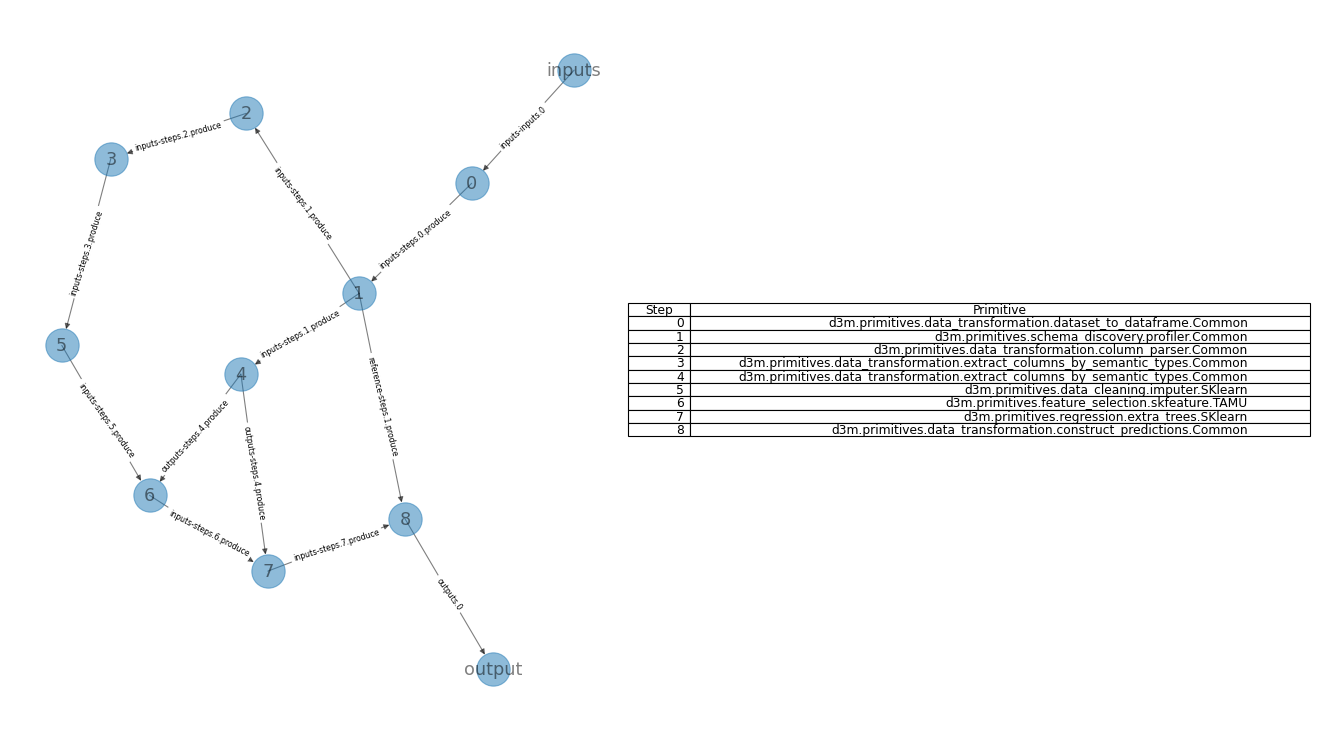

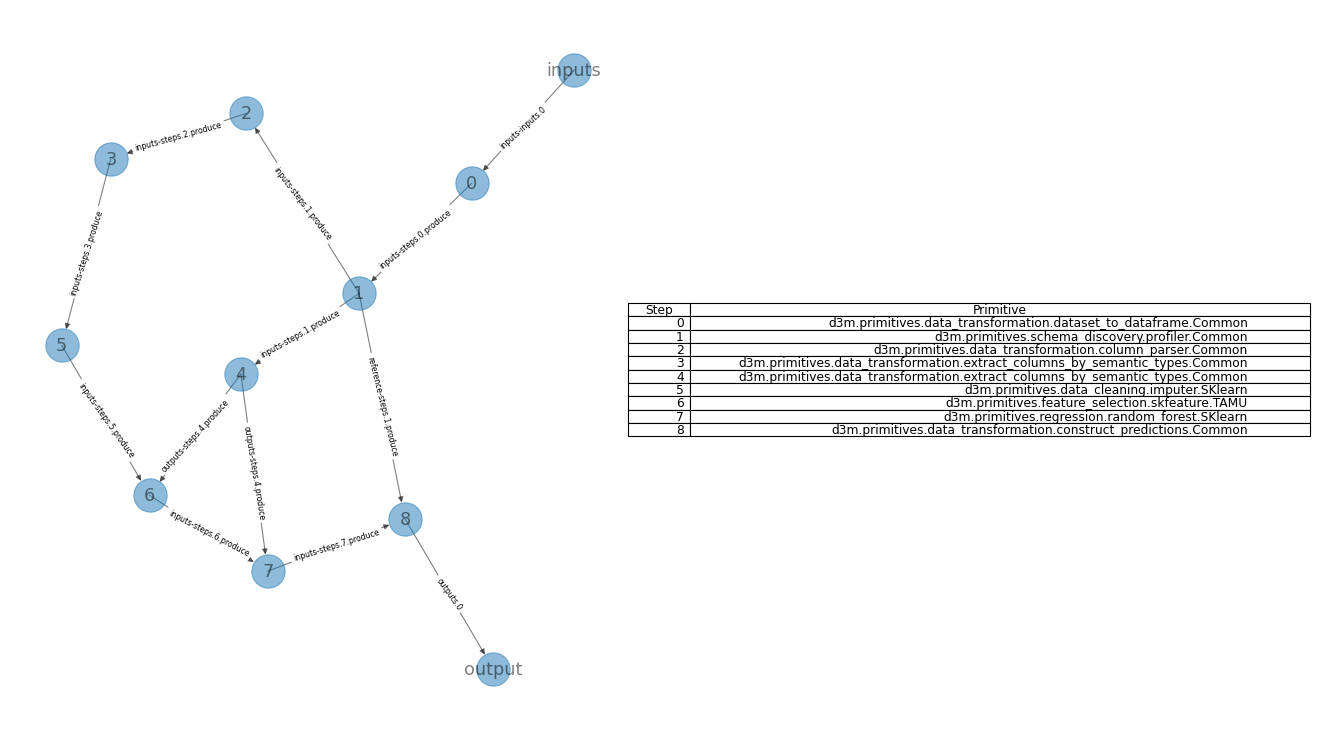

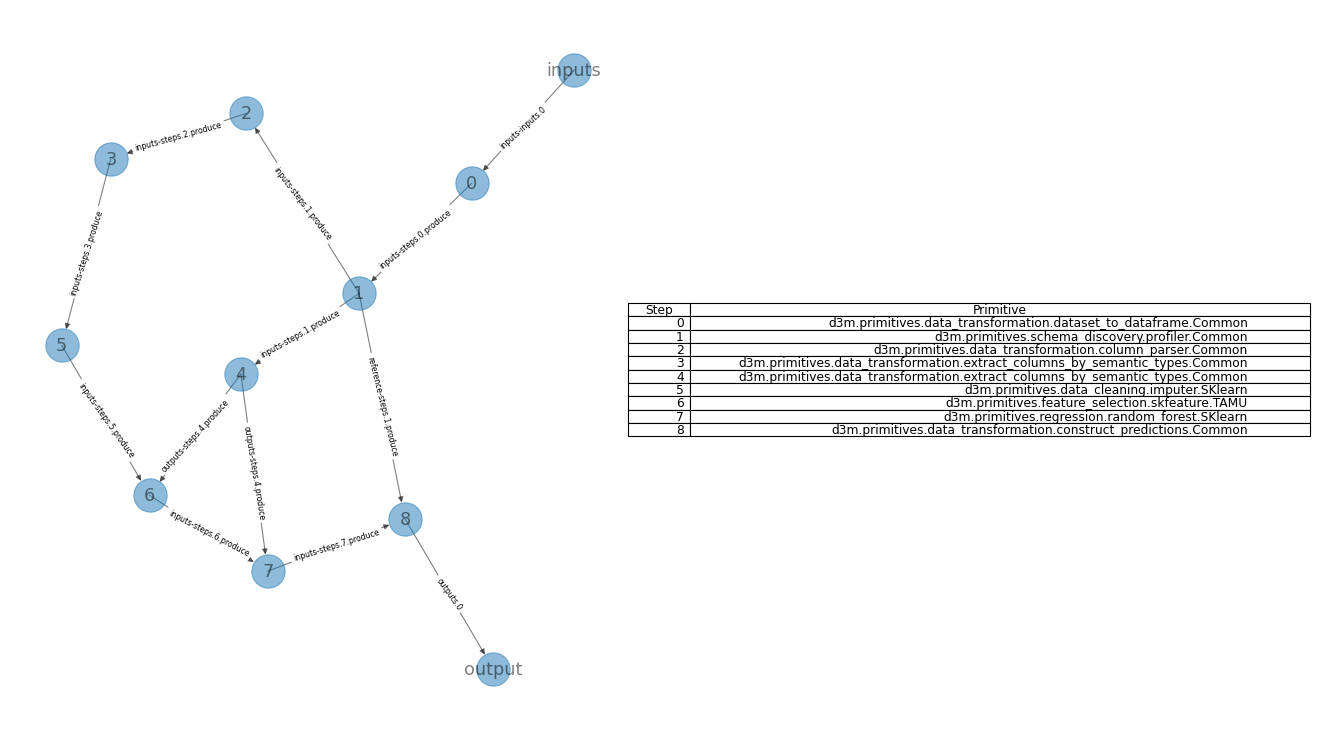

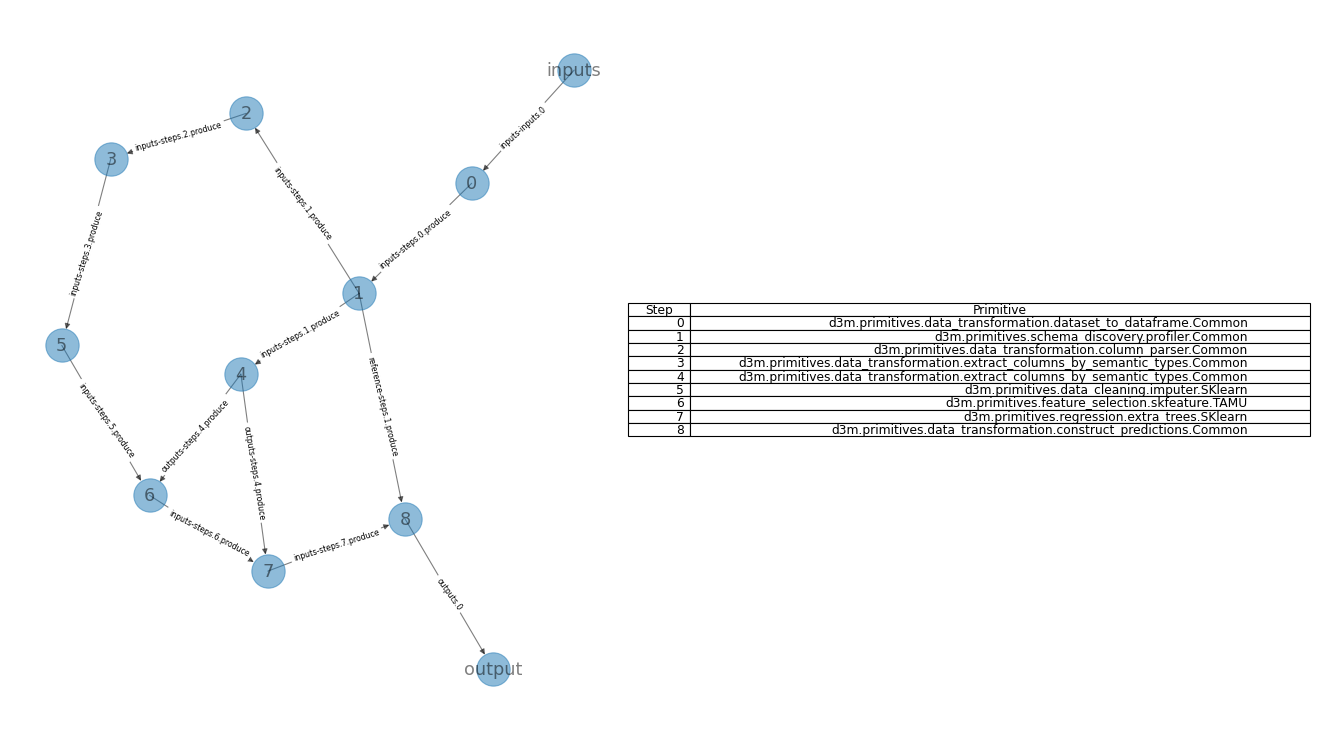

In [10]:
for result in search.history:
    pipeline_utils.plot_pipeline(result.pipeline)